## Author: Wenxuan Yang, email: ywenxuan616@berkeley.edu

## 1. Relevant Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import warnings

2023-03-22 20:49:40.569069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Load training and testing data set 

In [2]:
## read data with pandas
train =pd.read_csv("data/fashion-mnist_train.csv")
test =pd.read_csv("data/fashion-mnist_test.csv")

## 3. Plot data set images

In [3]:
## item labels
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
          "Sneaker","Bag","Ankle boot"]

In [4]:
df = train.copy()
n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)

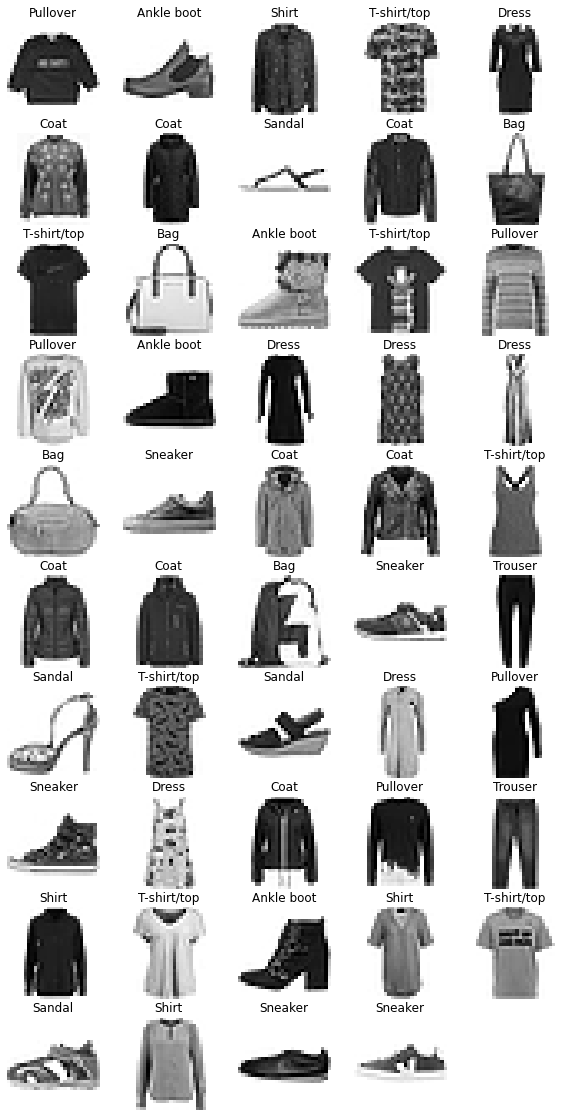

In [5]:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

In [6]:
# Remove rows with missing target, separate target from predictors
train.dropna(axis=0, subset=['label'], inplace=True)
y_train=train.label
train.drop(['label'], axis=1, inplace=True)

In [7]:
# Remove rows with missing target, separate target from predictors
test.dropna(axis=0, subset=['label'], inplace=True)
y_valid=test.label
test.drop(['label'], axis=1, inplace=True)

In [8]:
## shape of training data set
test.shape

(10000, 784)

In [9]:
## shape of training data set
train.shape

(60000, 784)

## 4. Data preprocessing

### 4.1. find the value range

In [10]:
train.max().max(), train.min().min()

(255, 0)

### 4.2. Normalise the inputs to make pixel values are in the [0-1] range 

In [11]:
train /= 255
test /= 255

## 5. Define model (a)

In [12]:
warnings.simplefilter('ignore')

In [13]:
# Design a Convolutional Neural Networks (CNN) to classify the input images.
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2023-03-22 20:49:58.035025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 6. Compile model (b)

In [14]:
#loss function: sparse_categorical_crossentropy
#Optimizer: adam, which stands for Adaptive Moment Estimation
#Metrics:accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 7. Train model (c)

### 7.1&2. Feed the training data to the model & The model learns to associate images and labels.

#### 7.1.1. Find the best-performing epoch

- **batch size** - the number of training examples used in one forward/backward pass of the neural network model
- **number of epochs** - the number of times the training algorithm iterates over the entire training set

Increasing the number of epochs leads to greater accuracy on the training set, but it can also lead to overfitting, demonstrated by an increase in the error rate on the test set.

In [15]:
from keras.callbacks import ModelCheckpoint
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [16]:
modeldiff = model.fit(train, 
                    y_train,
                    batch_size=64, 
                    epochs=30,
                    verbose=1,
                    validation_data=(test,y_valid))

Epoch 1/30
938/938 [==============================] - 18s 18ms/step - loss: 0.4236 - accuracy: 0.8513 - val_loss: 0.3072 - val_accuracy: 0.8909
Epoch 2/30
938/938 [==============================] - 16s 17ms/step - loss: 0.2848 - accuracy: 0.8978 - val_loss: 0.2631 - val_accuracy: 0.9074
Epoch 3/30
938/938 [==============================] - 19s 21ms/step - loss: 0.2390 - accuracy: 0.9135 - val_loss: 0.2488 - val_accuracy: 0.9100
Epoch 4/30
938/938 [==============================] - 18s 20ms/step - loss: 0.2101 - accuracy: 0.9238 - val_loss: 0.2348 - val_accuracy: 0.9184
Epoch 5/30
938/938 [==============================] - 16s 17ms/step - loss: 0.1834 - accuracy: 0.9337 - val_loss: 0.2410 - val_accuracy: 0.9155
Epoch 6/30
938/938 [==============================] - 17s 18ms/step - loss: 0.1635 - accuracy: 0.9408 - val_loss: 0.2289 - val_accuracy: 0.9213
Epoch 7/30
938/938 [==============================] - 16s 17ms/step - loss: 0.1412 - accuracy: 0.9487 - val_loss: 0.2328 - val_accuracy:

### 7.1.2. Evaluation

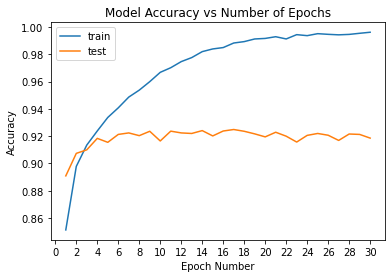

In [17]:
plt.plot(range(1,1+len(modeldiff.history['accuracy'])), modeldiff.history['accuracy'])
plt.plot(range(1,1+len(modeldiff.history['val_accuracy'])), modeldiff.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,32,2))
plt.show()

In [18]:
best_score = max(modeldiff.history['val_accuracy'])
best_epoch = np.array(modeldiff.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.924900 at epoch 17


Form the plot, we can find that the accuracy on training dataset incresed continuously by increasing the number of epochs. However, due to overfitting, there is a gap between training set accuracy and testing set accuracy and at some point the accuracy on testing set may start to decrease. Based on that, we can see at epoch 17 we can achieve the highest test set accuracy of 92.49%, which is better than apoch 30

### 7.3.  Make predictions & Verify that the predictions

In [19]:
predict_x=model.predict(test) 
y_pred=np.argmax(predict_x,axis=1)

y_valid=y_valid.values

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_valid)[0]
incorrect_indices = np.nonzero(y_pred != y_valid)[0]

313/313 [==============================] - 1s 3ms/step


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = [labels[x] for x in range(0,10)]
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.84      0.90      0.87      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.91      0.86      0.89      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.77      0.77      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



- Five of the ten classes (Trouser, Sandal, Sneaker, Bag, and Ankle boot) achieve an F1-score of 0.96 or higher. This model is perform well in correctly classifying these classes, which means there are obvious image features that can be used to tell them apart. However, the classes with the lowest F1-scores are Shirt (0.77), Pullover (0.87), Coat (0.89) and T-shirt/top (0.86), followed by Dress (0.92). This may suggest that it is more difficult to distingush these item pictures.

- The classes with the lowest precision are Shirt (0.77). Low precision suggests that there was some more items that we classified as shirt but which aren't actually shirt. 

- The classes with the lowest recall are Shirt (0.77). Low recall suggests that there was some shirts which we didn't identify as shirts.

In [21]:
matrix = pd.DataFrame(confusion_matrix(y_valid, y_pred), index=target_names, columns=target_names)
matrix.index.name = 'Predicted'
matrix.columns.name = 'Actual'
matrix

Actual,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Predicted,,,,,,,,,,
T-shirt/top,858,0,23,9,1,0,100,1,8,0
Trouser,1,995,1,1,1,0,0,0,1,0
Pullover,21,1,898,10,30,0,38,0,2,0
Dress,15,10,10,912,18,0,33,0,2,0
Coat,1,1,61,20,863,0,54,0,0,0
Sandal,0,1,0,0,0,964,0,20,2,13
Shirt,89,1,72,24,33,0,774,0,7,0
Sneaker,0,0,0,0,0,5,0,966,0,29
Bag,4,1,3,2,2,0,5,2,981,0


From the confusion matrix, we can easily find the shirt always be classified as t-shirt/top or pullover.